## Описание проекта

В российской авиакомпании F9, выполняющей внутренние пассажирские перевозки, важно понять предпочтения пользователей, покупающих билеты на разные направления.

Цель -  изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

Файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

### План работы:
1. Предобработка даных и аналитика
2. Проверка гипотезы <br>
Выводы

# 1. Предобработка даных и аналитика

In [1]:
!pip3 install -U seaborn

     |████████████████████████████████| 285 kB 1.8 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0


In [2]:
# импортируем библиотеки
import pandas as pd
import numpy as np

from scipy import stats as st

import seaborn as sns
from seaborn import lineplot
import matplotlib.pyplot as plt

In [3]:
# загрузим и изучим результат первого запроса с моделью самолета и количеством рейсов
df_1 = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')
df_1.info()
df_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
# загрузим и изучим результат третьего запроса со средним кол-ом рейсов по городам в сентябре 2018 года
df_2 = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')
df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [5]:
# загрузим и изучим результат последнего запроса с кол-ом билетов и пометками о фестивалях
df_3 = pd.read_csv('https://code.s3.yandex.net/datasets/query_last.csv')
df_3.info()
df_3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [6]:
# скорректируем тип столбца "Среднее кол-во рейсов", так как не может лететь 5,3 или 2,4 части самолета
df_2['average_flights'] = df_2['average_flights'].astype('int')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [7]:
# посмотрим на статистку среднего количества рейсов
df_2.describe()

,average_flights
count,101.000000
mean,5.217822
std,13.061090
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,129.000000


In [8]:
# проверим имеются ли дубликаты
df_2.duplicated().sum()

0

In [9]:
# выберем топ-10 городов по количеству рейсов
top_10 = df_2.nlargest(10, 'average_flights').reset_index(drop=True)
top_10

,city,average_flights
0,Москва,129
1,Санкт-Петербург,31
2,Новосибирск,17
3,Екатеринбург,11
4,Красноярск,11
5,Брянск,10
6,Пермь,10
7,Ростов-на-Дону,10
8,Советский,9
9,Сочи,9


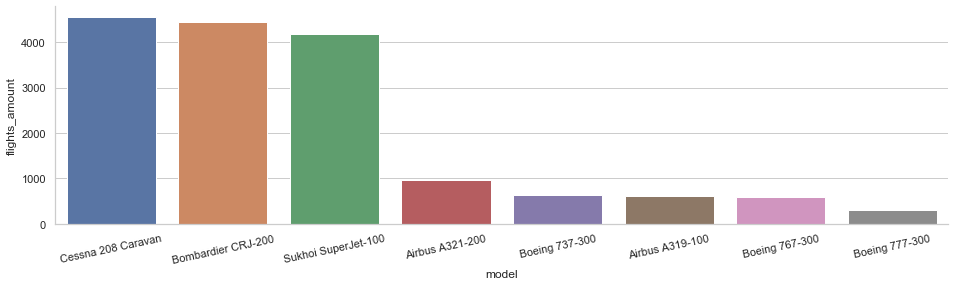

In [10]:
# построим график: модели самолётов и количество рейсов
df_1_sorted = df_1.sort_values(by='flights_amount', ascending=False)
f = plt.figure(figsize=(16,4))
sns.set(style='whitegrid')
ax = sns.barplot(x='model', y='flights_amount', data=df_1_sorted)
ax.set_xticklabels(df_1_sorted['model'], rotation=12)
sns.despine()

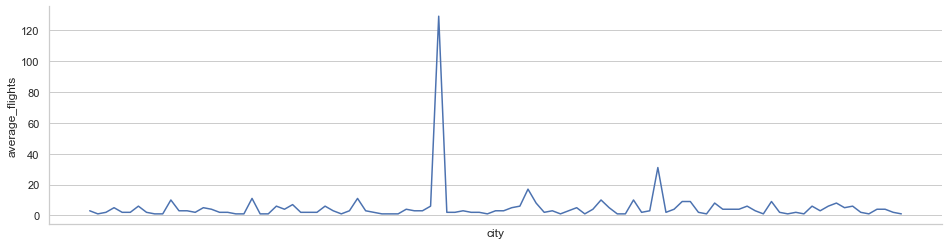

In [11]:
# построим график: города и количество рейсов
f = plt.figure(figsize=(16,4))
_ = lineplot(x='city', y='average_flights', data=df_2)
_.axes.get_xaxis().set_ticks([])
sns.despine()
plt.show()

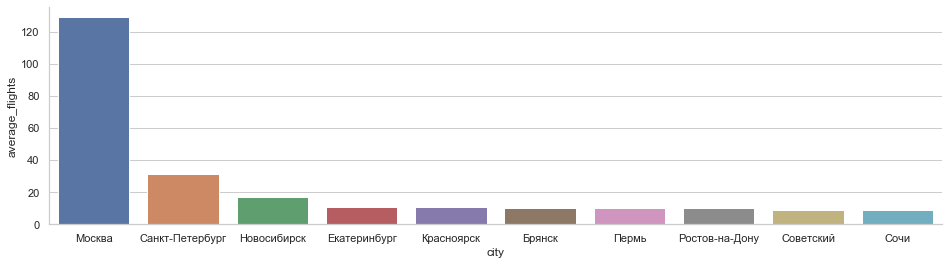

In [12]:
# построим график: топ-10 городов и количество рейсов
f = plt.figure(figsize=(16,4))
sns.set(style='whitegrid')
ax = sns.barplot(x='city', y='average_flights', data=top_10)
sns.despine()

В первой части исследования:
- импортировали 3 файлы с результатами запроса по внутренним пассажирским перевозкам и изучили данные в них;
- обновили типы данных "Количество рейсов", потому как не может вылететь половина самолета и проверили отсутствие дубликатов;
- самые популярные модели самолетов, как ни странно, не Boeing, Airbus (в среднем совершили всего по 500 рейсов), а Cessna, Bombardier и, конечно, Sukhoi Superjet-100 (от 4 тыс полетов, что приблизительно в 8 раз больше). Возможно, это связано просто с выбором по закупке/аренде российских авиакомпаний;
- если смотреть распределение по городам, то видим, что оно по большей части равномерно: в 75% городов прилетают и вылетают от 3 до 5 самолетов. Понятно, что это общая картина по регионам, имеются 2 пика, которые рассмотрели в следующем графике;
- при ближайшем рассмотрении топ-10 городов по количеству рейсов догадки подтвердились: Москва - самый огромный хаб с 3мя аэропортами, которые регулируют 129 рейсов, далее следует северная столица (31 рейс) и города-миллионики (от 9 до 17 полетов): Новосибирск, Екатеринбург, Красноярск и тд. 

# 2. Проверка гипотезы

In [13]:
# первым делом подготовим выборки, кол-во рейсов в недели фестивалей и в остальное время
df_3_fest = df_3.query('festival_week.notnull()')
df_3_fest = df_3_fest[['ticket_amount']]

df_3_wo_fest = df_3.query('festival_week.isnull()')
df_3_wo_fest = df_3_wo_fest[['ticket_amount']]

print(df_3_fest.head())
print(df_3_wo_fest.head())

   ticket_amount
0          43568
1          51034
6          51386
   ticket_amount
2          51675
3          51378
4          51492
5          51360
7          51670


In [14]:
# проверим выборки на нормальность для выбора статистического критерия
stat1, p1 = st.shapiro(df_3_fest)
stat2, p2 = st.shapiro(df_3_wo_fest)

alpha = .05

print('Результаты по первому набору данных')
print('W статистика: %.3f и p-value: %.3f' %(stat1, p1))

if(p1 > alpha):
    print('Похоже на распределение Гаусса\n')
else:
    print('Не похоже на распределение Гаусса\n')

print('Результаты по второму набору данных')
print('W статистика: %.3f и p-value: %.3f' %(stat2, p2))

if(p2 > alpha):
    print('Похоже на распределение Гаусса')
else:
    print('Не похоже на распределение Гаусса')

Результаты по первому набору данных
W статистика: 0.784 и p-value: 0.076
Похоже на распределение Гаусса

Результаты по второму набору данных
W статистика: 0.894 и p-value: 0.296
Похоже на распределение Гаусса


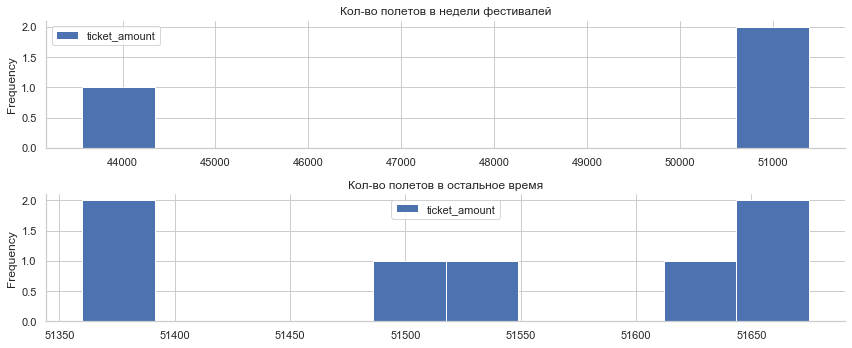

In [15]:
# попробуем еще посмотреть на визуализированное распределение
plt.figure(figsize=(12,5))

plt.subplot(211)
df_3_fest.plot(kind='hist', ax=plt.gca())
plt.title('Кол-во полетов в недели фестивалей')
sns.despine()

plt.subplot(212)
df_3_wo_fest.plot(kind='hist', ax=plt.gca())
plt.title('Кол-во полетов в остальное время')
sns.despine()
plt.tight_layout()
plt.show()

По графику распределения понятно, что ничего непонятно, поэтому проведем тесты по 2-м критериям:
1. По результату теста Шапиро для количественных данных, которые подчиняются закону нормального распределения и являются независимыми — Т-критерий Стьюдента для 2х независимых выборок;
2. И для случая, когда у нас не нормальное распредлением при тех же типах исследуемых данных — критерий Манна-Уитни.

При этом гипотезы будут едины для обоих случаев, в нулево будем утверждать, что отличий не имеется:<br>
- H₀ - Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время<br>
- H₁ - Средний спрос различается<br>

Принимать решение о принятия отвержении нулевой гипотезы будем по p-value, то есть вероятности получить наблюдаемый результат при условии, что нулевая гипотеза верна. Пороговое значение alpha возьмем общепринятоне - 5%.

In [16]:
# кейс 1

alpha = .05
results = st.ttest_ind(df_3_fest, df_3_wo_fest, equal_var=False)
print('Критерий Стьюдента p-значение: %.3f' %results.pvalue)

if(results.pvalue) < alpha:
    print('Нулевую гипотезу отвергаем')
else:
    print('Не удалось опровергнуть нулевую гипотезу')

Критерий Стьюдента p-значение: 0.377
Не удалось опровергнуть нулевую гипотезу


In [18]:
# кейс 2
# берем во внимание инфо из документации: тест эффективен для выборок от 20 наблюдений в каждом датасете

alpha = .05
mw_res = st.mannwhitneyu(df_3_fest, df_3_wo_fest, alternative="two-sided")
print('Критерий Манна-Уитни p-значение: %.3f' %mw_res.pvalue)

if(mw_res.pvalue > alpha):
    print('Не удалось опровергнуть нулевую гипотезу')
else:
    print('Нулевую гипотезу отвергаем')

Критерий Манна-Уитни p-значение: 0.068
Не удалось опровергнуть нулевую гипотезу


In [45]:
# посмотрим на среднее обеих выборок
print('Среднее кол-во рейсов в недели фестивалей:', int(df_3_fest['ticket_amount'].mean()))
print('Среднее кол-во рейсов в остальное время:', int(df_3_wo_fest['ticket_amount'].mean()))

Среднее кол-во рейсов в недели фестивалей: 48662
Среднее кол-во рейсов в остальное время: 51530


Статистика нам особо не помогла, но основная загвоздка в недостаточном объеме данных — всего лишь 3 и 7 наблюдений:
- Кейс 1: p-значение критерия Стьюдента 0.377, то есть вероятнее всего спрос различается 
- Кейс 2 с противоположным результатом: p-значение критерия Манна-Уитни 0.034 и в данной реалии объем спроса скорее схож <br>

Также посчитали средние выборок - находятся на одном уровне ~50 тыс рейсов, в дни фестивалей на 3 тыс меньше загрузка в аэропортах.

# Вывод

Итого,изучили и провели небольшую предобработку 3 датасетов с результатами запроса по внутренним пассажирским перевозкам: обновили тип данных и удостоверились, что данные не дублируются.

Построили графики и увидели следующие картины:
- самые популярные модели самолетов, как ни странно, не Boeing, Airbus (в среднем совершили всего по 500 рейсов), а Cessna, Bombardier и, конечно, Sukhoi Superjet-100 (от 4 тыс полетов, что приблизительно в 8 раз больше). Возможно, это связано просто с выбором по закупке/аренде авиаконгломератов, как Аэрофлот обязан закупаться суперджетом;
- если смотреть распределение по городам, то видим, что оно по большей части равномерно: в 75% городов прилетают и вылетают от 3 до 5 самолетов. Понятно, что это общая картина по регионам, имеются 2 пика, которые рассмотрели в следующем графике;
- при ближайшем рассмотрении топ-10 городов по количеству рейсов догадки подтвердились: Москва - самый огромный хаб с 3-мя аэропортами, которые регулируют 129 рейсов, далее следует северная столица (31 рейс) и города-миллионики (от 9 до 17 полетов): Новосибирск, Екатеринбург, Красноярск и тд. 

Проверка гипотез оказалась достаточно туманной затеей:
- в первую очередь за счет того, что в выборках недостаточно данных - всего лишь 3 и 7 наблюдений;
- провели тесты на нормальность: по Шапиро вероятнее событие при котором распредления похожи на Гаусса, хотя по графику из-за ограниченного количества данных видно, что распределение никакое;
- поэтому провели тест по 2-м кейсам с нулевой гипотезой "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время", альтернативная соотвественно утверждает противоположное. Пороговое значение alpha взяли общепринятоне - 5%.

Кейс 1: p-значение критерия Стьюдента 0.377, то есть вероятнее всего спрос различается <br>
Кейс 2 с противоположным результатом: p-значение критерия Манна-Уитни 0.034 и в данной реалии объем спроса скорее схож <br>

В любом случае, ни один тест никогда однозначено не подтвердил или не опровергнул бы нашу гипотезу, тем более в условиях отсутствия данных и рассмотрения исключительного случая (аэропорты Москвы с загрузкой почти в 10 раз превышающей загрузку аэропортов других городов) за очень короткий период (всего лишь 9 недель). 

Если просмотреть на средние выборок, глобально они находятся примерно на одном уровне ~50 тыс рейсов, в дни фестивалей загрузка в аэропортах на 3 тыс меньше, но как пояснили ранее влиять на это могут многие другие показатели и для более точного утверждения необходима дополнительная информация, как кол-во рейсов за год, список всех мероприятий в городе, также следует учитывать сезональность и тд. Стоит также проанализировать сами фестивали, например: ЦА посетителей, музыкантов, потому как есть предположение, что Видфест скорее смотрят онлайн, тк это фестиваль ютуб блогеров и большинство аудитории скорее подростки, которые вероятно не могут полететь одни на самолете, а Пикник Афиши вероятнее всего посещают преимущественно горожане.